## Load Data 

In [24]:
import pandas as pd
# Load the CSV file to inspect the data
file_path = "Spellman.csv"
data = pd.read_csv(file_path)
data=data.drop(['time'],axis=1)
data

40    50     60    70    80    90   100   110   120   130  ...   170  \
0    -0.070 -0.23 -0.100  0.03 -0.04 -0.12 -0.28 -0.44 -0.09  0.12  ...  0.59   
1     0.215  0.09  0.025 -0.04 -0.04 -0.02 -0.51 -0.08  0.00  0.46  ... -0.30   
2     0.150  0.15  0.220  0.29 -0.10  0.15 -0.73  0.19 -0.15  0.29  ...  0.12   
3    -0.350 -0.28 -0.215 -0.15  0.16 -0.12  0.26  0.00  0.13 -0.20  ...  0.07   
4    -0.415 -0.59 -0.580 -0.57 -0.09 -0.34  0.49  0.32  1.15  0.20  ... -0.48   
...     ...   ...    ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4376 -0.060  0.08  0.210  0.34  0.65 -0.26  0.14 -0.33  0.53 -0.02  ...  0.14   
4377  0.155  0.19  0.235  0.28 -0.26  0.21 -0.40  0.34 -0.80  0.34  ...  0.34   
4378 -0.255 -0.36 -0.300 -0.24  1.30 -0.07  0.29 -0.20  0.25 -0.47  ... -0.81   
4379  0.570  0.12 -0.070 -0.26 -0.44 -0.21 -1.08  0.39 -0.17  1.61  ...  0.12   
4380  0.405  0.17 -0.045 -0.26 -0.60 -0.09 -0.85  0.17 -0.05  1.26  ...  0.17   

       180   190   200   210   220   230   240   250    260  
0     0.34 -0.28 -0.09 -0.44  0.31  0.03  0.57  0.00  0.010  
1    -0.38  0.07 -0.04  0.13 -0.06 -0.26 -0.10  0.27  0.235  
2    -0.17  0.11 -0.15  0.03 -0.26 -0.34 -0.34  0.25  0.190  
3     0.61 -0.20  0.49 -0.43  0.80 -0.47  1.01 -0.36 -0.405  
4    -0.40 -0.59  0.54 -0.09  1.03  0.08  0.57 -0.26 -0.310  
...    ...   ...   ...   ...   ...   ...   ...   ...    ...  
4376 -0.64 -0.26  0.53 -0.17  0.59 -0.96  0.40 -0.23 -0.325  
4377  0.15  0.30 -0.06  0.13 -0.44 -1.03  0.14  0.30  0.250  
4378  0.89  0.07  1.04 -0.32  0.80 -0.13  0.84 -0.39 -0.415  
4379 -0.96 -0.31 -0.81 -0.34 -1.21 -1.36 -0.12  0.69  0.555  
4380 -1.90 -0.21 -0.45 -0.31 -0.39 -0.22 -0.08  0.65  0.520  

[4381 rows x 23 columns]

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Gene Expression Scatter Plot

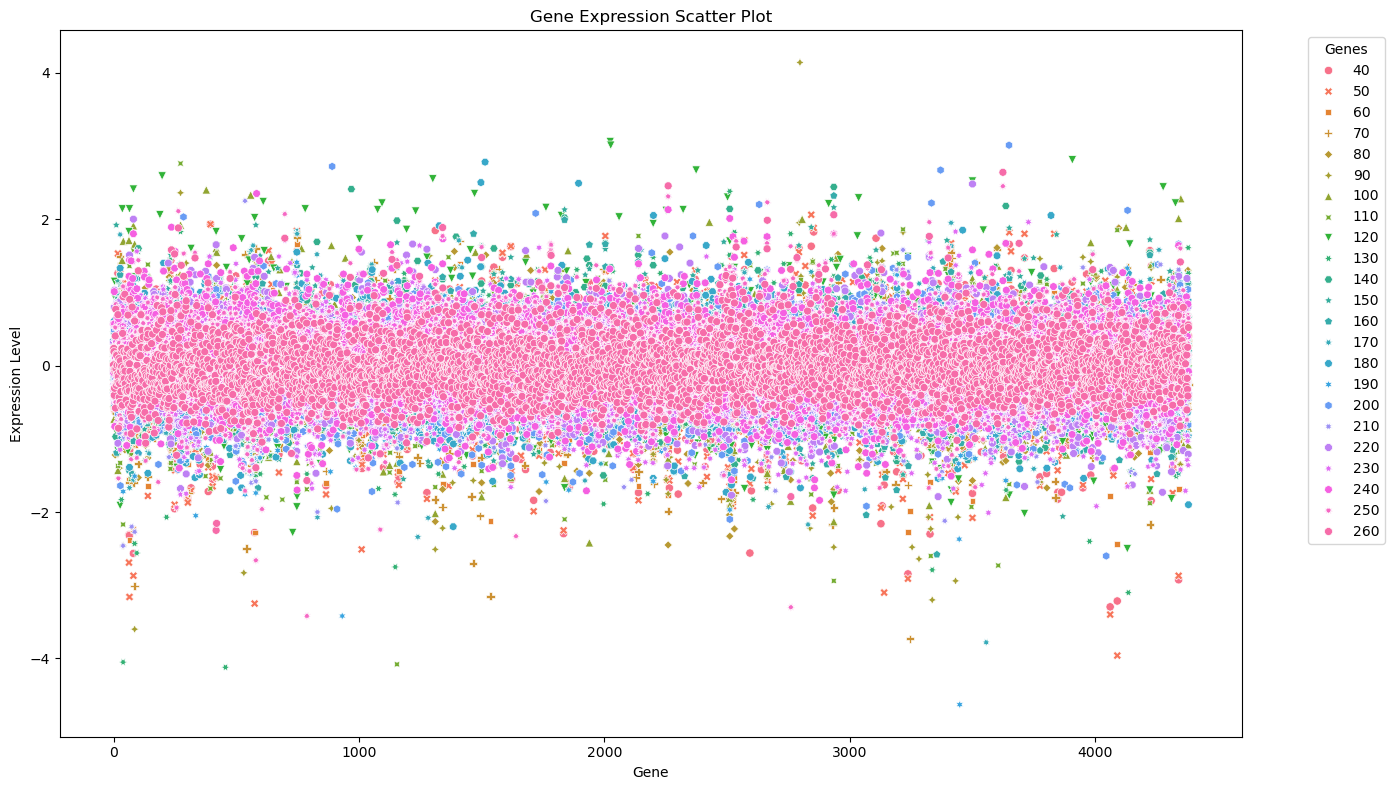

In [26]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data)
plt.title('Gene Expression Scatter Plot')
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.legend(title='Genes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### K means Clustering

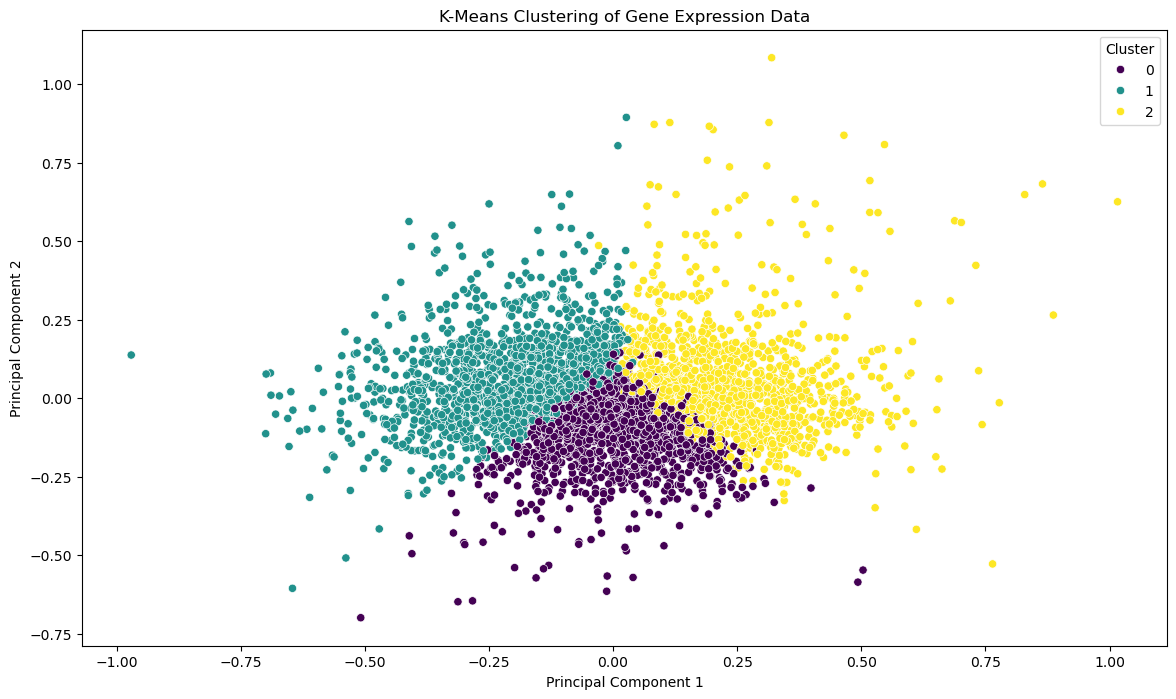

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



# Normalize the data
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters to the desired number of clusters
kmeans.fit(normalized_data)
labels = kmeans.labels_

# Add the cluster labels to the data
normalized_data['Cluster'] = labels

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data.drop('Cluster', axis=1))

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('K-Means Clustering of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


### Evaluating the Clusters using DBSCAN

Silhouette Score: 0.5974757045090558


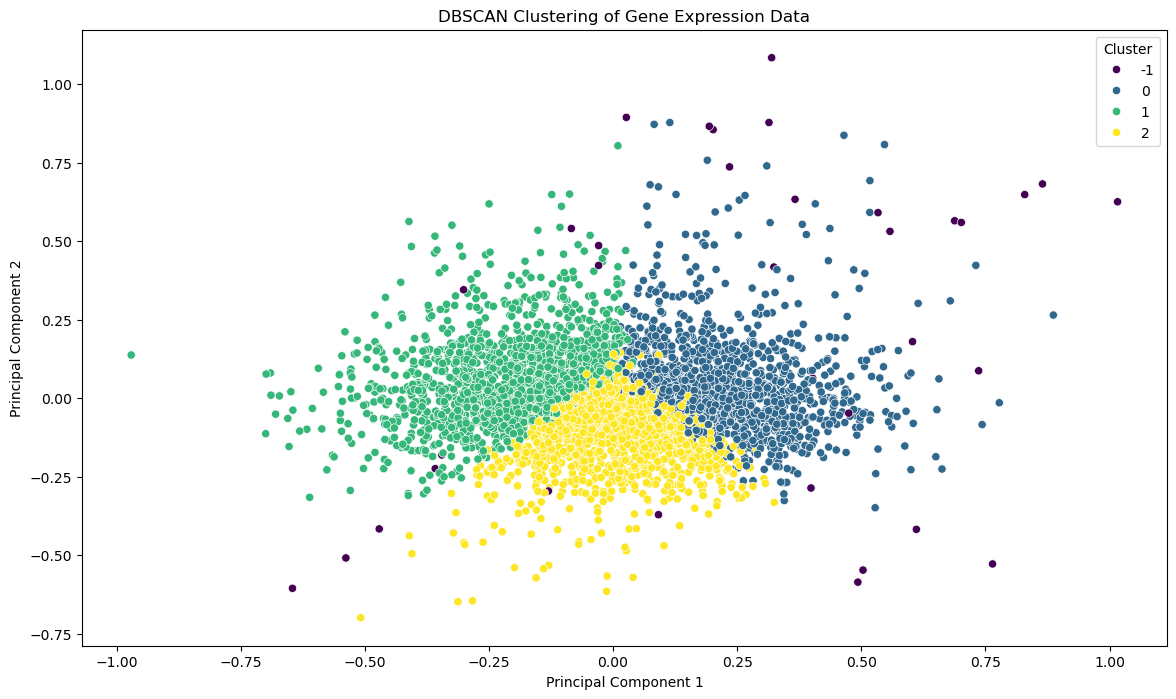

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(normalized_data)

# Evaluate the clustering
silhouette_avg = silhouette_score(normalized_data, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Add the cluster labels to the data
normalized_data['Cluster'] = labels

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data.drop('Cluster', axis=1))

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('DBSCAN Clustering of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


### Apply Agglomerative Clustering

Silhouette Score: 0.5968029508436931


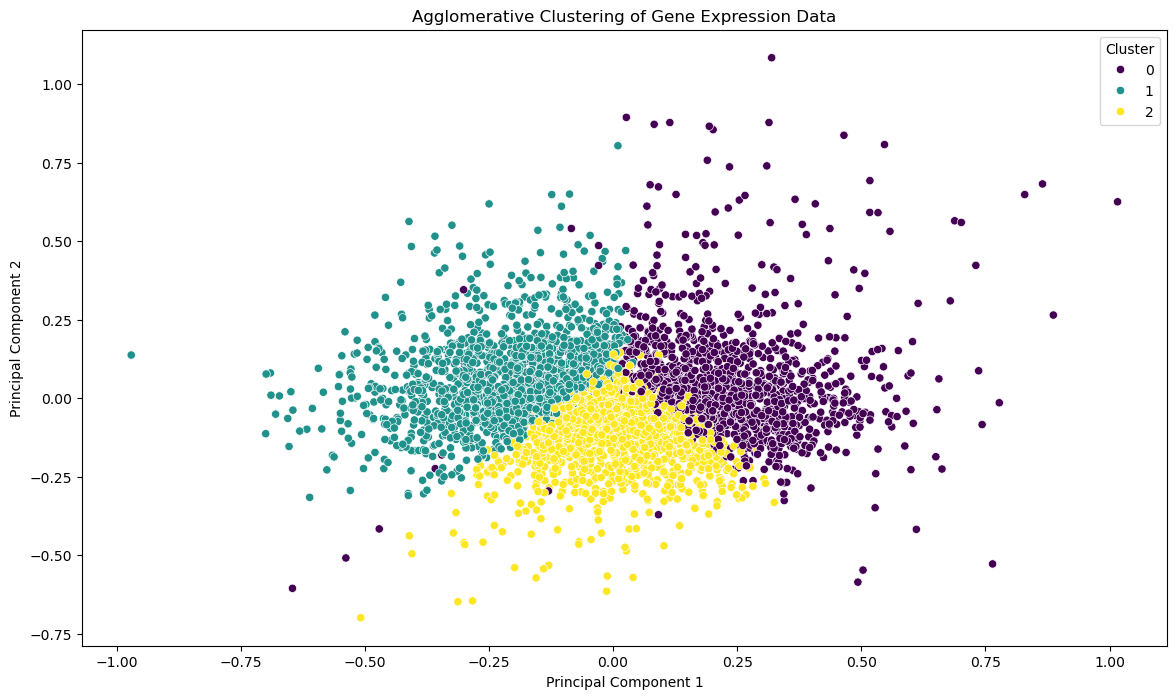

In [29]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(normalized_data)

# Evaluate the clustering
silhouette_avg = silhouette_score(normalized_data, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Add the cluster labels to the data
normalized_data['Cluster'] = labels

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data.drop('Cluster', axis=1))

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('Agglomerative Clustering of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


### Clusters Visualization with UMAP and KMeans

C:\Users\ujami\miniconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score: 0.903


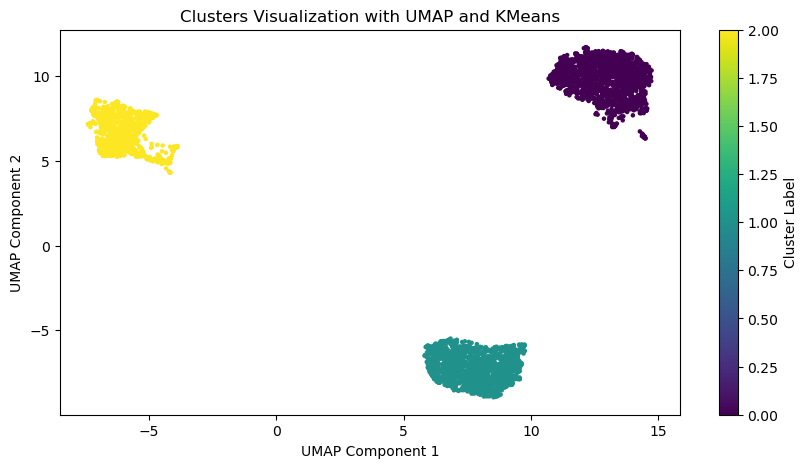

In [37]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import gseapy as gp
import numpy as np
import networkx as nx


# Perform UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(data)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
yhat = kmeans.fit_predict(X_umap)

# Calculate silhouette score
sil_score = silhouette_score(X_umap, yhat)
print(f'Silhouette Score: {sil_score:.3f}')

# Add cluster labels to the DataFrame
data['Cluster'] = yhat

# Visualize the clusters
plt.figure(figsize=(10, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=yhat, cmap='viridis', s=5)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('Clusters Visualization with UMAP and KMeans')
plt.colorbar(label='Cluster Label')
plt.show()


In [32]:
# Extract gene lists for each cluster
clusters = data['Cluster'].unique()
gene_lists = {}
for cluster in clusters:
    gene_lists[cluster] = data[data['Cluster'] == cluster].index.astype(str).tolist()

# Print gene lists for each cluster to verify
for cluster, genes in gene_lists.items():
    print(f'Cluster {cluster} Gene List (first 10 genes): {genes[:10]}')


Cluster 0 Gene List (first 10 genes): ['0', '3', '4', '8', '11', '14', '16', '17', '20', '21']
Cluster 1 Gene List (first 10 genes): ['1', '2', '5', '10', '13', '15', '22', '28', '31', '34']
Cluster 2 Gene List (first 10 genes): ['6', '7', '9', '12', '18', '19', '27', '35', '37', '43']


In [41]:
# Convert gene IDs to integer type
for cluster, genes in gene_lists.items():
    gene_lists[cluster] = [int(gene_id) for gene_id in genes]

# Create empty correlation matrix dictionary
correlation_matrices = {}

# Iterate over each cluster and calculate correlation matrix
for cluster, genes in gene_lists.items():
    # Select the subset of data for the current cluster
    cluster_data = data.loc[data.index.isin(genes)]
    
    # Calculate correlation matrix
    correlation_matrix = cluster_data.corr()
    
    # Handle NaN values by filling them with 0
    correlation_matrix = correlation_matrix.fillna(0)
    
    # Store the correlation matrix in the dictionary
    correlation_matrices[cluster] = correlation_matrix


# Iterate over each cluster and remove the last elements from correlation matrices
for cluster, corr_matrix in correlation_matrices.items():
    # Remove the last row and column
    correlation_matrices[cluster] = corr_matrix.iloc[:-1, :-1]


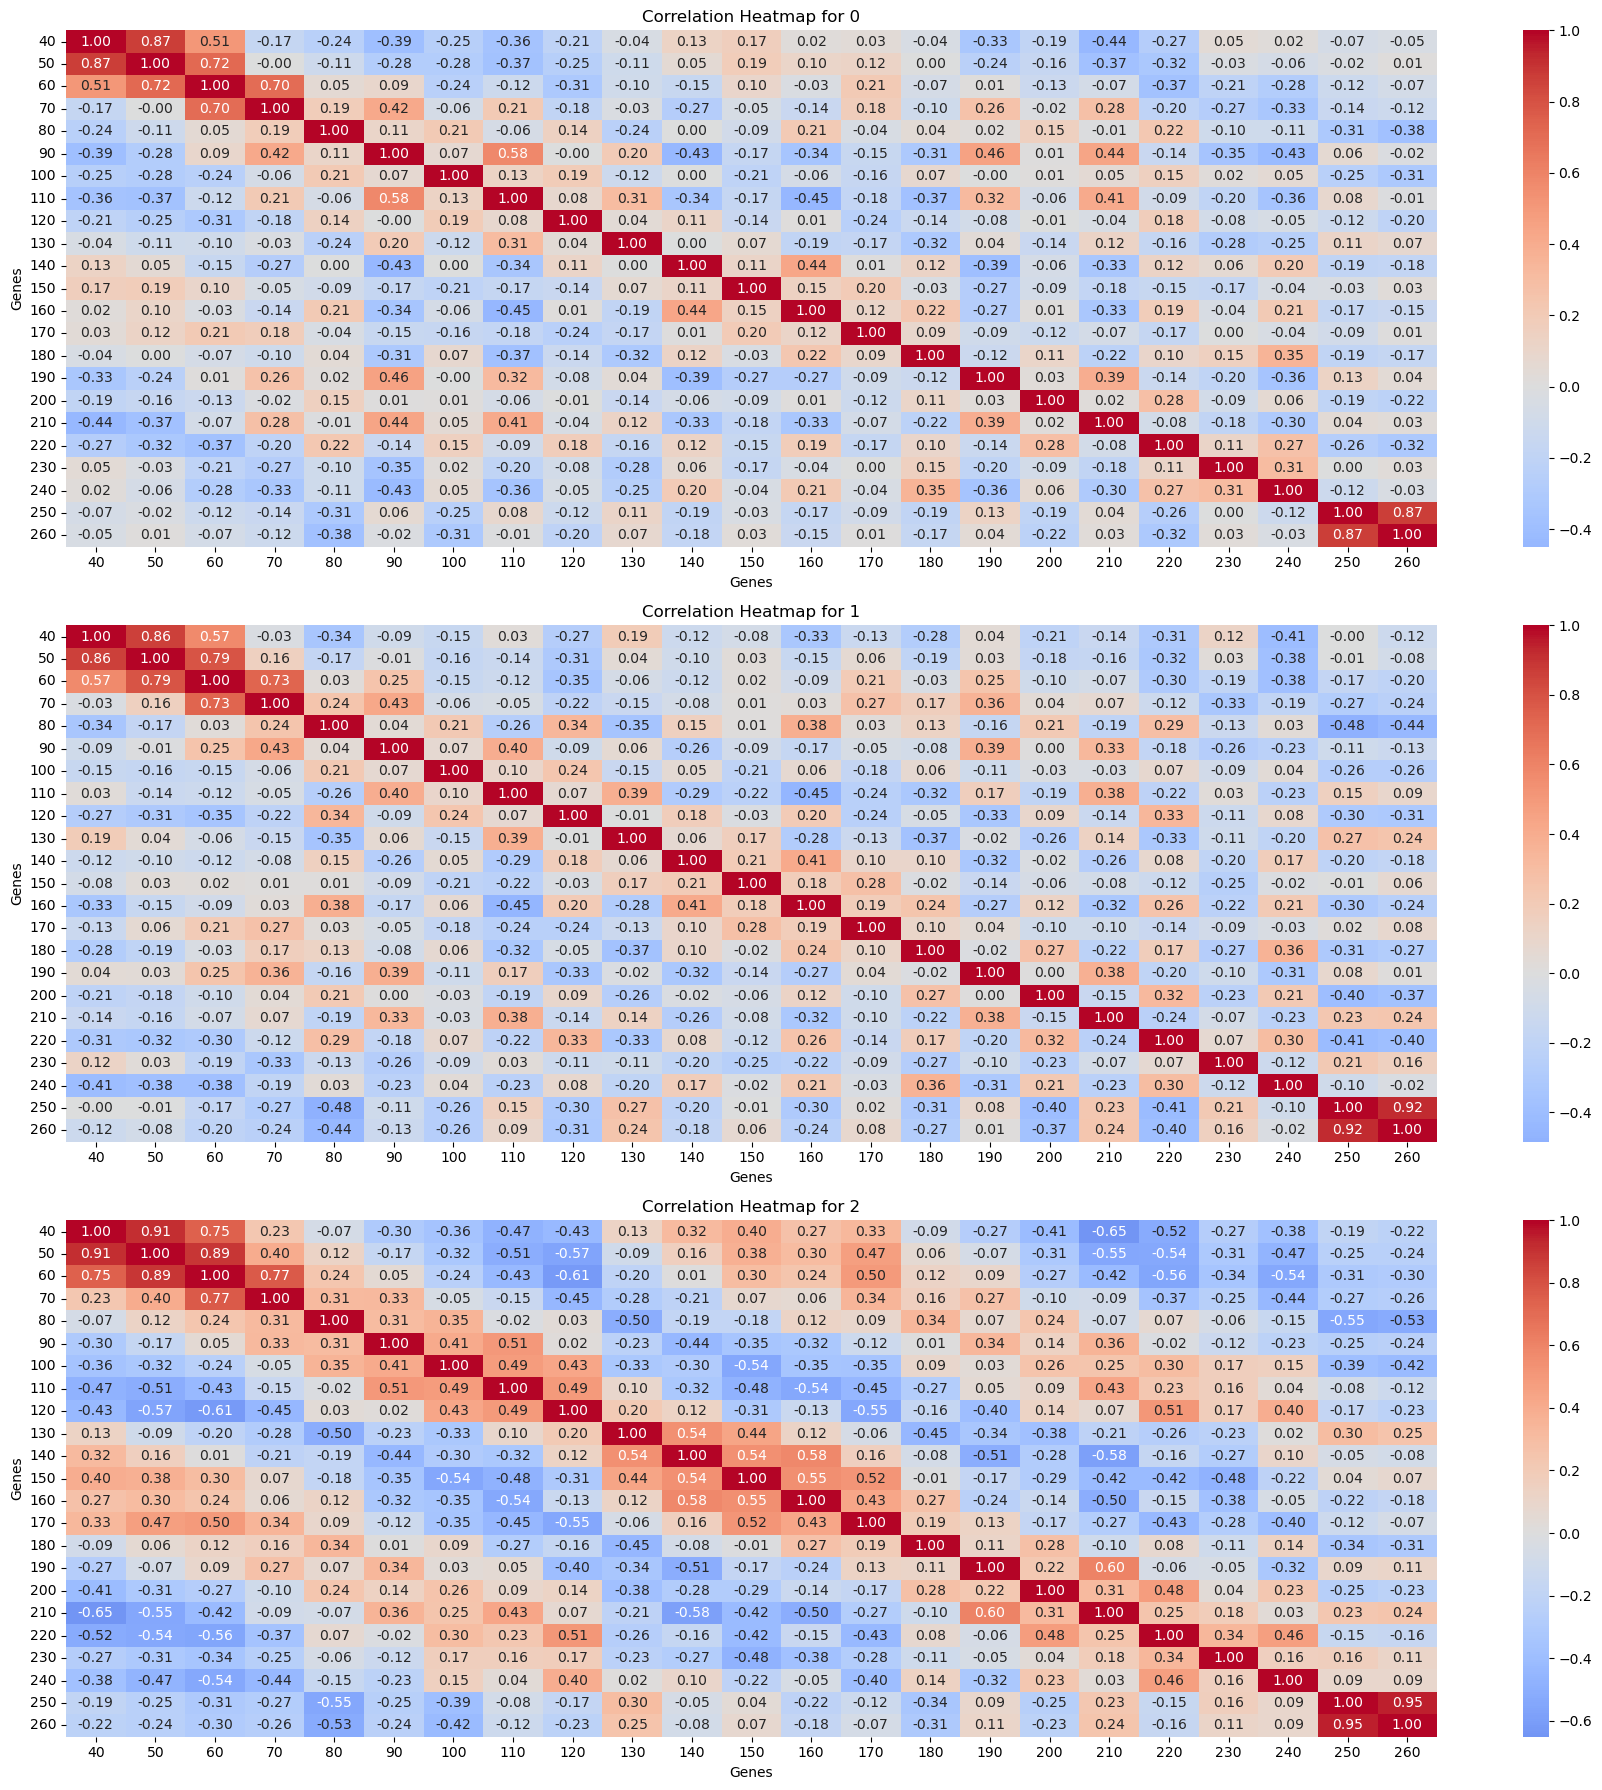

In [42]:
import seaborn as sns

# Function to plot heatmaps for each cluster
def plot_heatmaps(correlation_matrices):
    plt.figure(figsize=(18, 18))
    for i, (cluster, corr_matrix) in enumerate(correlation_matrices.items()):
        plt.subplot(3, 1, i + 1)
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
        plt.title(f'Correlation Heatmap for {cluster}')
        plt.xlabel('Genes')
        plt.ylabel('Genes')
    plt.tight_layout()
    plt.show()

# Plot the heatmaps
plot_heatmaps(correlation_matrices)

Nodes in cluster 0 after filtering: ['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260']


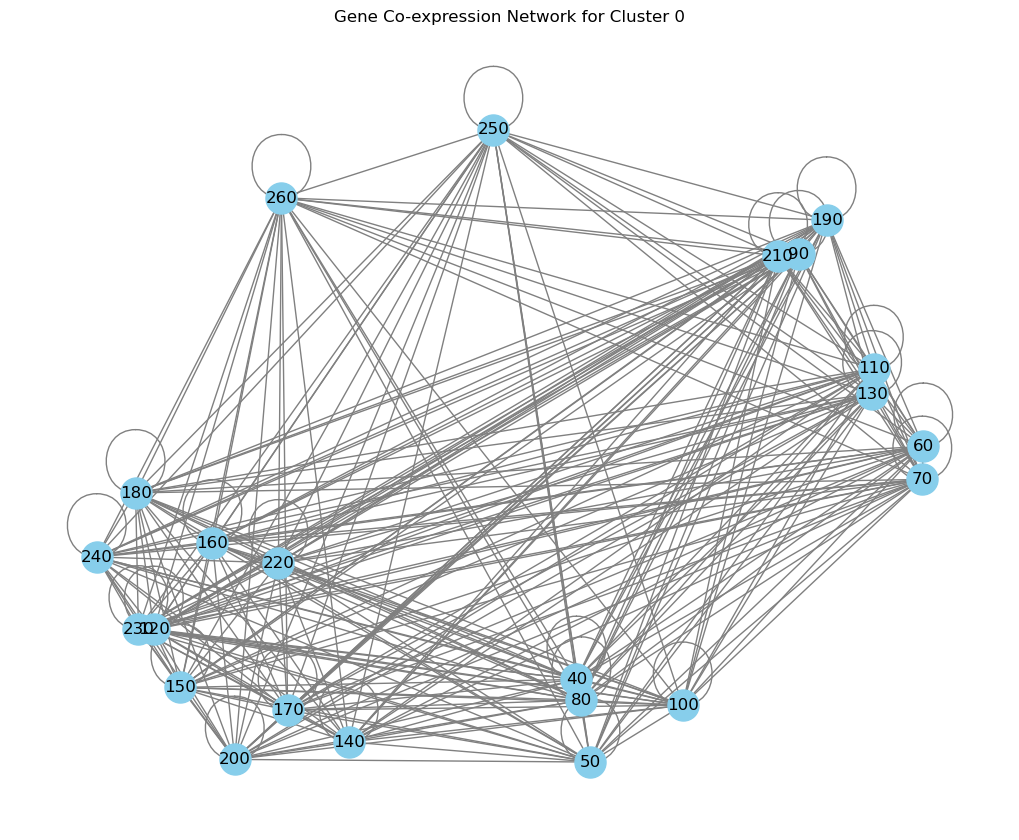

Nodes in cluster 1 after filtering: ['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260']


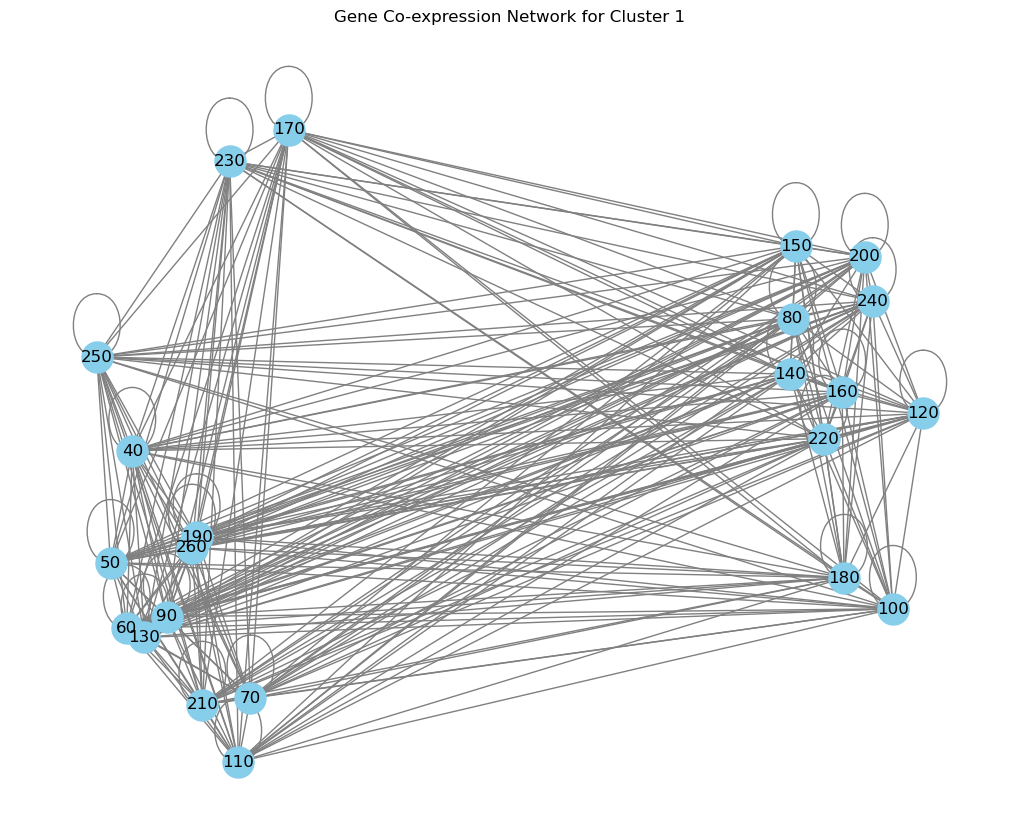

Nodes in cluster 2 after filtering: ['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260']


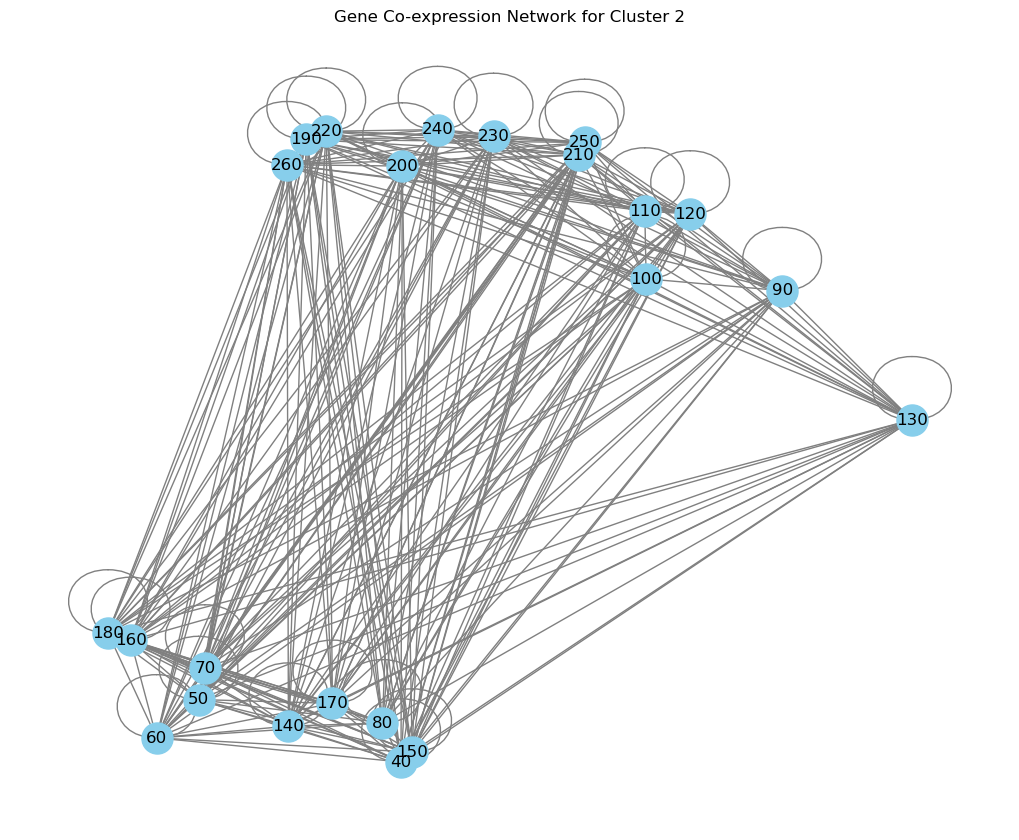

In [43]:
import networkx as nx
import os

# Ensure output directory for plots exists
plot_output_dir = 'coexpression_network_plots'
os.makedirs(plot_output_dir, exist_ok=True)

# Function to remove unwanted nodes
def filter_nodes(graph, unwanted_nodes):
    graph.remove_nodes_from(unwanted_nodes)

# Iterate through each cluster and plot the network
for cluster, correlation_matrix in correlation_matrices.items():
    # Convert the correlation matrix to a graph
    G = nx.from_pandas_adjacency(correlation_matrix)
    
    # Remove the 'Cluster' node if it exists
    filter_nodes(G, unwanted_nodes=['Cluster'])
    
    # Debugging: Print node names to confirm 'Cluster' is removed
    print(f"Nodes in cluster {cluster} after filtering: {G.nodes}")

    # Plot the network
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Generate layout positions
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
    plt.title(f'Gene Co-expression Network for Cluster {cluster}')
    
    # Save the plot
    plt.savefig(os.path.join(plot_output_dir, f'cluster_{cluster}_coexpression_network.png'))
    plt.show()


### Network with community detection

Nodes in cluster 0 after filtering: ['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260']


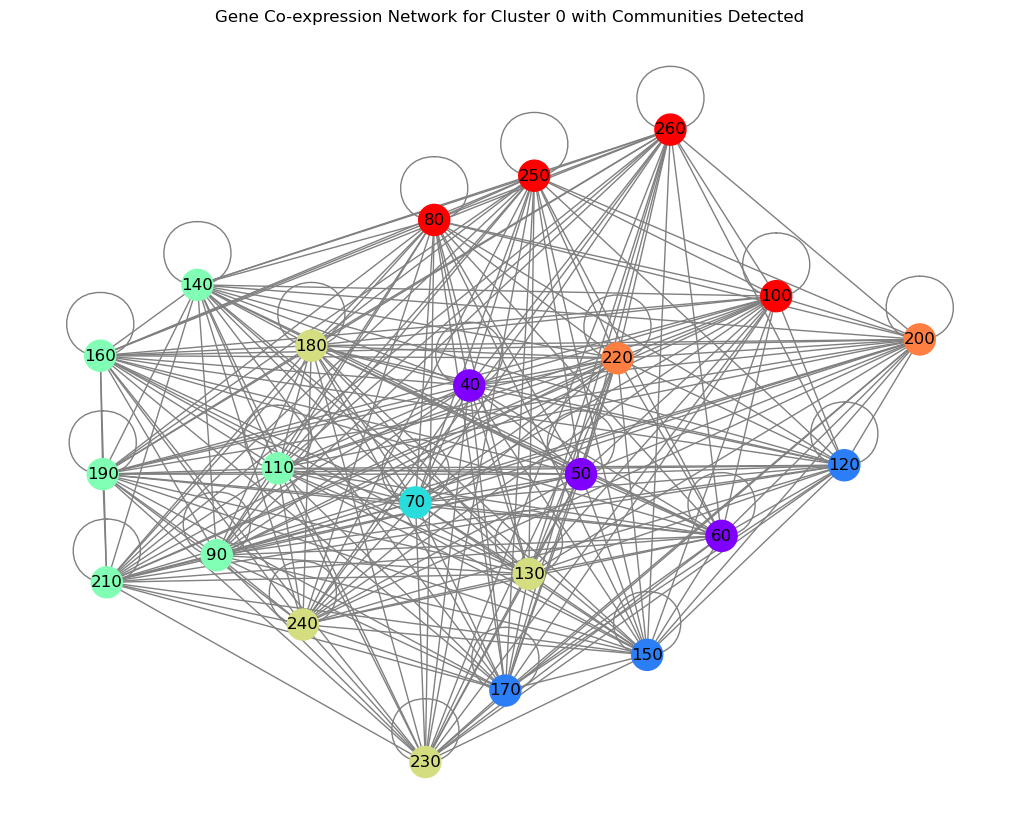

Nodes in cluster 1 after filtering: ['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260']


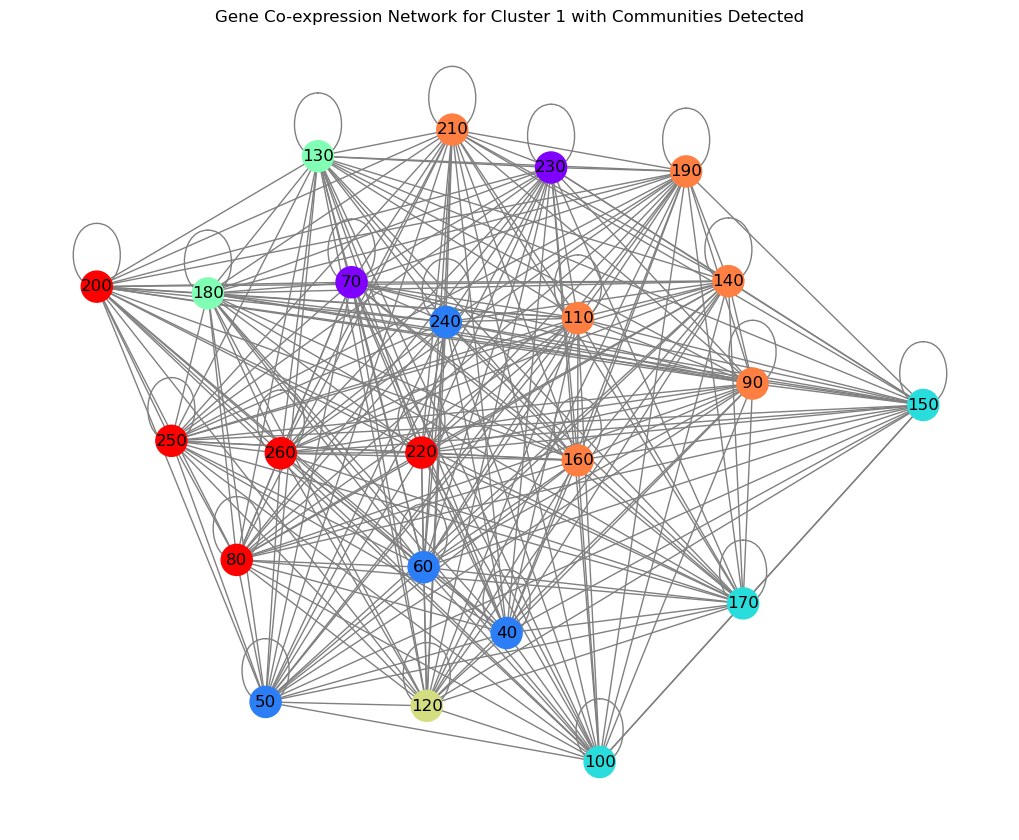

Nodes in cluster 2 after filtering: ['40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260']


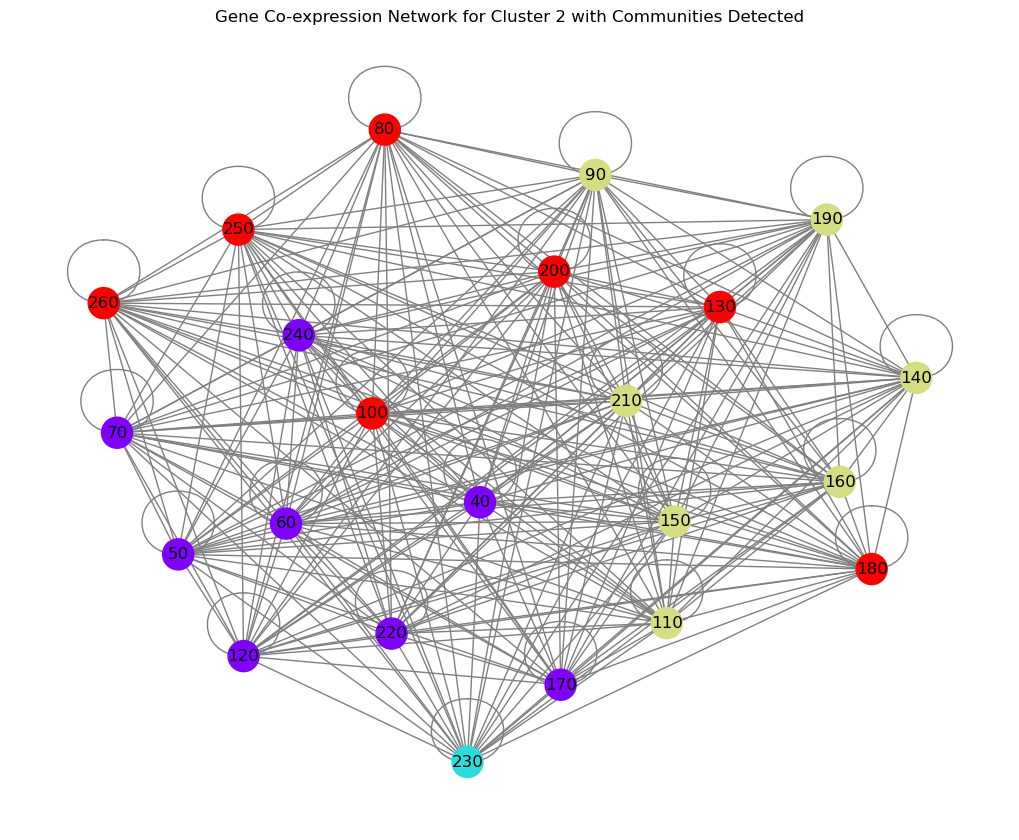

In [44]:
import community.community_louvain as community_louvain

# Ensure output directory for plots exists
plot_output_dir = 'coexpression_network_plots'
os.makedirs(plot_output_dir, exist_ok=True)

# Function to remove unwanted nodes
def filter_nodes(graph, unwanted_nodes):
    graph.remove_nodes_from(unwanted_nodes)

# Iterate through each cluster and plot the network with community detection
for cluster, correlation_matrix in correlation_matrices.items():
    # Use absolute values to avoid negative weights
    correlation_matrix = correlation_matrix.abs()
    
    G = nx.from_pandas_adjacency(correlation_matrix)
    
    # Remove the 'Cluster' node if it exists
    filter_nodes(G, unwanted_nodes=['Cluster'])
    
    # Debugging: Print node names to confirm 'Cluster' is removed
    print(f"Nodes in cluster {cluster} after filtering: {G.nodes}")
    
    # Detect communities using the Louvain method
    partition = community_louvain.best_partition(G)
    
    # Create a color map based on communities
    community_colors = [partition[node] for node in G.nodes]
    
    # Plot the network with communities
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Generate layout positions
    nx.draw(G, pos, with_labels=True, node_color=community_colors, node_size=500, edge_color='gray', cmap=plt.cm.rainbow)
    plt.title(f'Gene Co-expression Network for Cluster {cluster} with Communities Detected')
    
    # Save the plot
    plt.savefig(os.path.join(plot_output_dir, f'cluster_{cluster}_coexpression_network_with_communities.png'))
    plt.show()
